In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("DFM_Cleaned_Data.xlsx")

In [3]:
df.head()

,Unnamed: 0,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name
0,0,246,0,0.866838,6,0,medium,0.134415,Left,4,124467,42,Female,Married,Sales
1,1,134,0,0.555718,2,0,low,0.511041,Left,3,112210,23,Female,Unmarried,Sales
2,2,156,1,0.474082,2,0,medium,0.405101,Left,3,126150,24,Female,Unmarried,Sales
3,3,256,0,0.961360,6,0,low,0.152974,Left,4,125346,51,Female,Married,Support
4,4,146,0,0.507349,2,0,medium,0.434845,Left,3,113707,23,Female,Unmarried,Sales


In [4]:
df.columns

Index(['Unnamed: 0', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status',
       'dept_name'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000
mean,7072.985638,201.063737,0.144123,0.649780,3.800643,0.021222,0.621296,3.499321,112113.184995,32.982637
std,4086.184773,49.952798,0.351227,0.267768,1.235573,0.144128,0.250441,1.462815,8482.112078,9.994620
min,0.000000,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000,100101.000000,22.000000
25%,3533.500000,156.000000,0.000000,0.525743,3.000000,0.000000,0.450388,3.000000,105771.500000,24.000000
50%,7071.000000,200.000000,0.000000,0.688119,4.000000,0.000000,0.652453,3.000000,111296.000000,29.000000
75%,10611.500000,245.000000,0.000000,0.858391,5.000000,0.000000,0.824957,4.000000,116654.500000,41.000000
max,14149.000000,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000,57.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13995 non-null  int64  
 1   avg_monthly_hrs    13995 non-null  int64  
 2   filed_complaint    13995 non-null  int64  
 3   last_evaluation    13995 non-null  float64
 4   n_projects         13995 non-null  int64  
 5   recently_promoted  13995 non-null  int64  
 6   salary             13995 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             13995 non-null  object 
 9   tenure             13995 non-null  int64  
 10  employee_id        13995 non-null  int64  
 11  age                13995 non-null  int64  
 12  gender             13995 non-null  object 
 13  marital_status     13995 non-null  object 
 14  dept_name          13995 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'employee_id', 'age', 'gender', 'marital_status', 'dept_name'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13995 non-null  int64  
 1   filed_complaint    13995 non-null  int64  
 2   last_evaluation    13995 non-null  float64
 3   n_projects         13995 non-null  int64  
 4   recently_promoted  13995 non-null  int64  
 5   salary             13995 non-null  object 
 6   satisfaction       13995 non-null  float64
 7   status             13995 non-null  object 
 8   tenure             13995 non-null  int64  
 9   employee_id        13995 non-null  int64  
 10  age                13995 non-null  int64  
 11  gender             13995 non-null  object 
 12  marital_status     13995 non-null  object 
 13  dept_name          13995 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 1.5+ MB


In [10]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000,13995.000000
mean,201.063737,0.144123,0.649780,3.800643,0.021222,0.621296,3.499321,112113.184995,32.982637
std,49.952798,0.351227,0.267768,1.235573,0.144128,0.250441,1.462815,8482.112078,9.994620
min,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,2.000000,100101.000000,22.000000
25%,156.000000,0.000000,0.525743,3.000000,0.000000,0.450388,3.000000,105771.500000,24.000000
50%,200.000000,0.000000,0.688119,4.000000,0.000000,0.652453,3.000000,111296.000000,29.000000
75%,245.000000,0.000000,0.858391,5.000000,0.000000,0.824957,4.000000,116654.500000,41.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000,57.000000


array([[<AxesSubplot:title={'center':'avg_monthly_hrs'}>,
        <AxesSubplot:title={'center':'filed_complaint'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'n_projects'}>,
        <AxesSubplot:title={'center':'recently_promoted'}>,
        <AxesSubplot:title={'center':'satisfaction'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

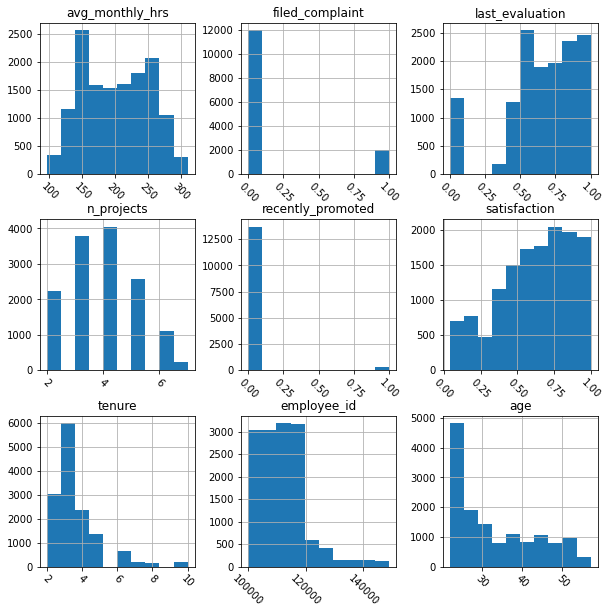

In [11]:
df.hist(figsize=(10,10), xrot=-45)

<AxesSubplot:>

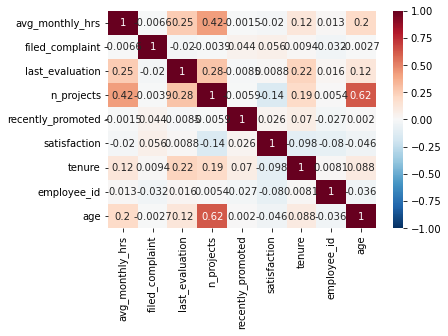

In [24]:
import seaborn as sb
sb.heatmap(df.corr(),annot=True,cmap="RdBu_r" ,vmin=-1,vmax=1)

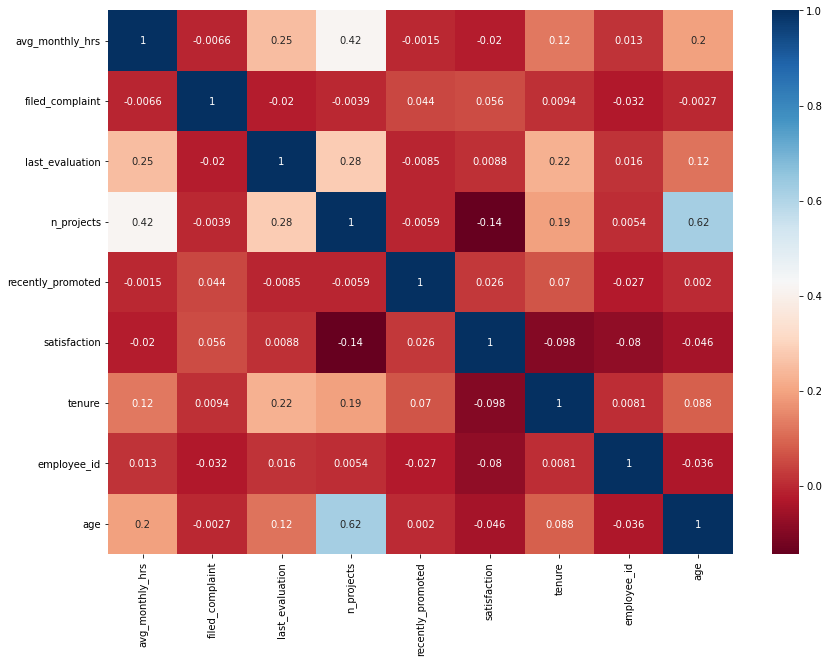

In [30]:
# plot the correlation heatmap
fig, ax = plt.subplots(figsize=(14,10)) 
sb.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)

plt.show()

In [17]:
Status = df.groupby('status')
Status.mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
status,,,,,,,,,
Employed,199.094442,0.175272,0.640127,3.784735,0.026192,0.675682,3.383121,111051.247653,33.278727
Left,207.338618,0.044870,0.680537,3.851331,0.005384,0.448004,3.869578,115496.899192,32.039186


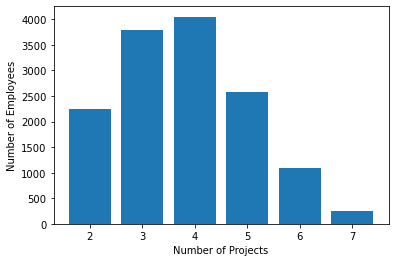

In [28]:
num_projects=df.groupby('n_projects').count()
plt.bar(num_projects.index.values, num_projects['status'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

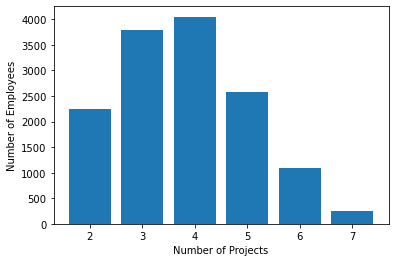

In [33]:
num_projects=df.groupby('n_projects').count()
plt.bar(num_projects.index.values, num_projects['last_evaluation'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

In [37]:
num_projects=df.groupby('status')['n_projects'].count()
num_projects

status
Employed    10652
Left         3343
Name: n_projects, dtype: int64

In [52]:
left_count=df.groupby('status')['satisfaction'].sum()
left_count

status
Employed    7197.359415
Left        1497.676093
Name: satisfaction, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

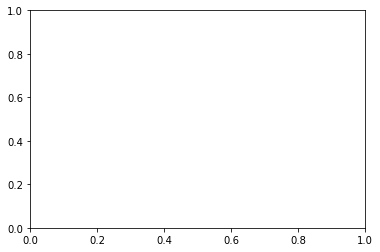

In [24]:
left_count=df.groupby('satisfaction')['status'].count()
plt.bar(df.satisfaction, left_count)
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

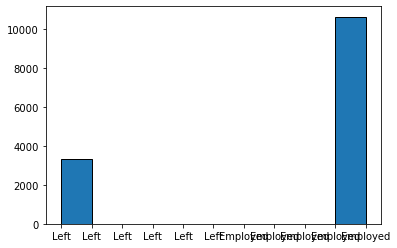

In [54]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.hist(df.status, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [25]:
feature = df.dtypes[df.dtypes=='object'].index
feature

Index(['salary', 'status', 'gender', 'marital_status', 'dept_name'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='gender'>

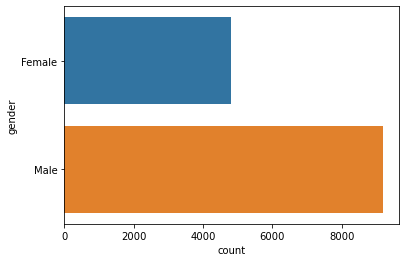

In [26]:
sb.countplot(data=df, y='gender')

<AxesSubplot:xlabel='count', ylabel='marital_status'>

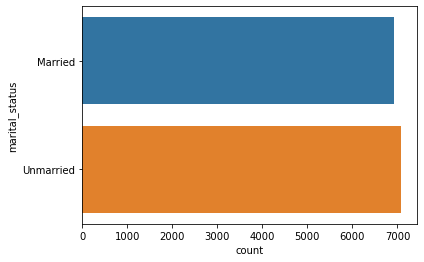

In [31]:
sb.countplot(data=df, y='marital_status')

<AxesSubplot:xlabel='count', ylabel='salary'>

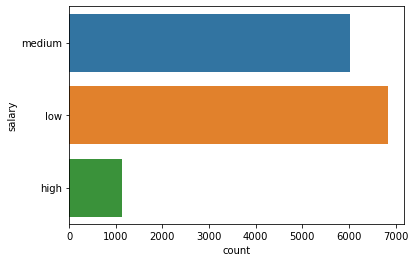

In [32]:
sb.countplot(data=df, y='salary')

<AxesSubplot:xlabel='count', ylabel='status'>

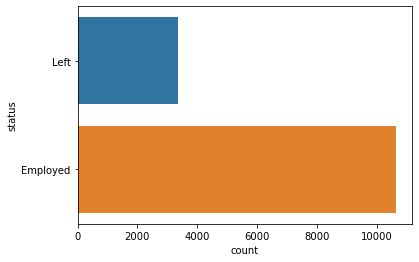

In [33]:
sb.countplot(data=df, y='status')

<AxesSubplot:xlabel='count', ylabel='dept_name'>

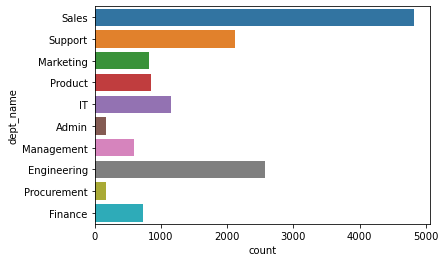

In [34]:
sb.countplot(data=df, y='dept_name')

<AxesSubplot:xlabel='satisfaction', ylabel='status'>

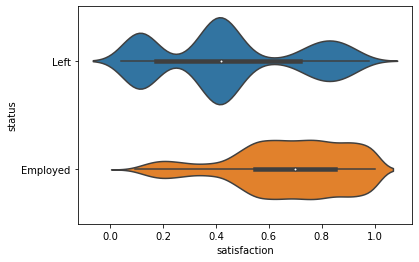

In [35]:
sb.violinplot(y='status', x='satisfaction', data=df)

<AxesSubplot:xlabel='last_evaluation', ylabel='status'>

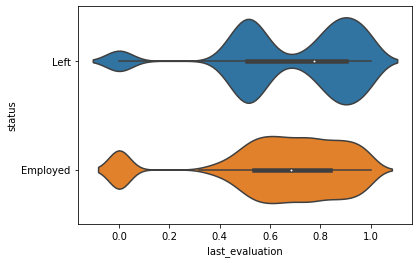

In [36]:
sb.violinplot(y='status', x='last_evaluation', data=df)

<AxesSubplot:xlabel='n_projects', ylabel='status'>

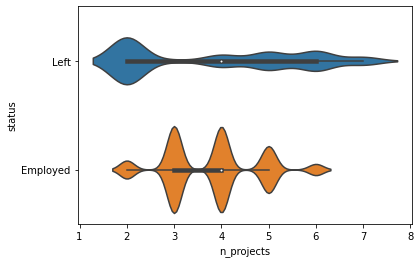

In [37]:

sb.violinplot(y='status', x='n_projects', data=df)

<AxesSubplot:xlabel='avg_monthly_hrs', ylabel='status'>

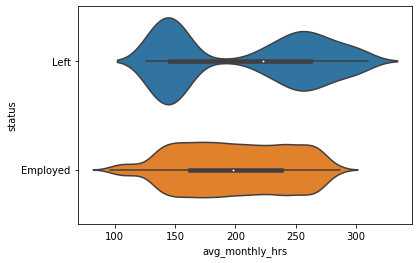

In [38]:
sb.violinplot(y='status', x='avg_monthly_hrs', data=df)

<AxesSubplot:xlabel='tenure', ylabel='status'>

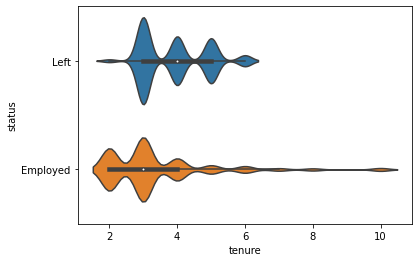

In [39]:
sb.violinplot(y='status', x='tenure', data=df)